# **Kütüphanelerin Import Edilmesi**

In [496]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [497]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [498]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [499]:
#################################################################################
# Sınıflandırma Problemleri için Algoritmaların Impoer Edilmesi.
#################################################################################

# 1.Lojistik Regresyon - (Logistic Regression) (LR) Algortiması için Kütüphanenin Import Edilmesi.
from sklearn.linear_model import LogisticRegression

# 2.Rastgele Ormanlar (Random Forests) (RF) Algoritması için Kütüphanenin Import Edilmesi.
from sklearn.ensemble import RandomForestClassifier

#################################################################################
# Veri Manipülasyonu ve Matematiksel Hesaplamalar için Kütüphanelerin Import Edilmesi.
#################################################################################
import pandas as pd
import numpy as np

#################################################################################
# Grafik Çizimleri ve Görselleştirme için Kütüphanelerin Import Edilmesi.
#################################################################################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image

#################################################################################
# Doğal Dil İşleme (Natural Language Processing - NLP)  Üzerine Kütüphanelerin Import Edimesi
#################################################################################
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud
import nltk

#################################################################################
# Model Seçme İşlemleri için Kütüphanelerin Import Edilmesi
#################################################################################
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.model_selection import cross_validate, validation_curve, GridSearchCV
from sklearn import model_selection

#################################################################################
# Encode İşlemleri için Gerekli Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.preprocessing import LabelEncoder

#################################################################################
# Başarı Değerlendirme için Kütüphanelerin Import Edilmesi.
#################################################################################
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

#################################################################################
# Çıktı göründüleri için ayarlamaların yapılması.
#################################################################################
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

#################################################################################
# Bazı Uyarıları Almamak için Kütüpanelerin Import Edilmesi.
#################################################################################
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=Warning) #Olası bazı hataları ignore ediyoruz, görmezden geliyoruz.

# **İş Problemi**

Amazon üzerinden satışlarını gerçekleştiren ev tesktili ve günlük giyim odaklı üretimler yapan Kozmos, ürünlerine gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını artırmayı hedeflemektedir. Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlencek ve etiketlenen veri ile sınıflandırma modeli oluşturulacaktır.

# **Veri Seti Hikayesi**

Veri seti belirli bir ürün grubuna ait yapılan yorumları, yorum başlığını, yıldız sayısını ve yapılan yorumu kaç kişinin faydalı bulduğunu belirten değişkenlerden oluşmaktadır.

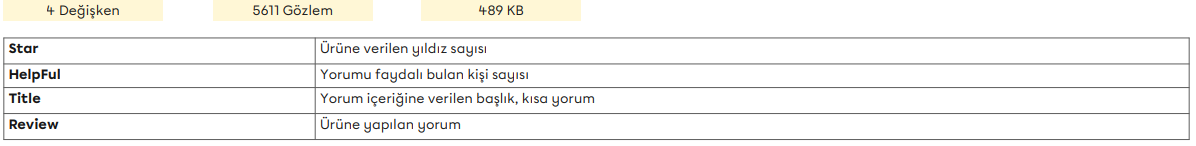

# **Proje Görevleri**

## **Görev 1 : Metin Ön İşleme**

### **Adım 1:**  amazon.xlsx verisini okutunuz.

In [500]:
df = pd.read_excel("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Ödevler - Projeler miuul/4.Doğal Dil İşlemeye Giriş/1.Proje: KOZMOS Amazon Yorumları için Duygu Analizi/amazon/amazon.xlsx")

In [501]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


### **Adım 2:**  Review değişkeni üzerinde;
a. Tüm harfleri küçük harfe çeviriniz.

b. Noktalama işaretlerini çıkarınız.

c. Yorumlarda bulunan sayısal ifadeleri çıkarınız.

d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız.

e. 1000'den az geçen kelimeleri veriden çıkarınız.

f. Lemmatization işlemini uygulayınız

**Projeye başlamadan önce rahat çalışabilmek için değişken isimlerini tek tip yazı boyutuna getirelim.**

In [502]:
df.columns = [col.upper() for col in df.columns]

**a. Tüm harfleri küçük harfe çeviriniz.**

In [503]:
df[["REVIEW"]].head()

,REVIEW
0,Happy with it
1,Good quality material however the panels are m...
2,Product was fun for bedroom windows.<br />Imag...
3,Lo unico que me gustaria es que sean un poco ...
4,Great bang for the buck I can't believe the qu...


In [504]:
df["REVIEW"] = df["REVIEW"].str.lower()

In [505]:
df[["REVIEW"]].head()

,REVIEW
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows.<br />imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can't believe the qu...


**b. Noktalama işaretlerini çıkarınız.**

In [506]:
df["REVIEW"] = df["REVIEW"].str.replace("[^\w\s]", " ")

In [507]:
df[["REVIEW"]].head()

,REVIEW
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows br imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can t believe the qu...


**c. Yorumlarda bulunan sayısal ifadeleri çıkarınız.**

In [508]:
df["REVIEW"] = df["REVIEW"].str.replace("\d", " ")

In [509]:
df[["REVIEW"]].head()

,REVIEW
0,happy with it
1,good quality material however the panels are m...
2,product was fun for bedroom windows br imag...
3,lo unico que me gustaria es que sean un poco ...
4,great bang for the buck i can t believe the qu...


**d. Bilgi içermeyen kelimeleri (stopwords) veriden çıkarınız.**

In [510]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [511]:
sw = stopwords.words("english")

In [512]:
df["REVIEW"] = df["REVIEW"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [513]:
df[["REVIEW"]].head()

,REVIEW
0,happy
1,good quality material however panels mis matched
2,product fun bedroom windows br imagery bit str...
3,lo unico que gustaria es que sean un poco mas ...
4,great bang buck believe quality material vibra...


**e. 1'den az geçen kelimeleri veriden çıkarınız.**

In [514]:
tem_df = pd.Series(" ".join(df["REVIEW"]).split()).value_counts()

**Tekil (unique) kelime sayısına bakalım.**

In [515]:
pd.Series(" ".join(df["REVIEW"]).split()).nunique()

5804

In [516]:
drops = tem_df[tem_df <= 1]

**2805 tane kelime bizim metnimizde 2 defadan az geçmiş.**

**O yüzden bunları sileceğiz.**

In [517]:
len(tem_df)

5804

In [518]:
len(drops)

2805

In [519]:
len(tem_df) - len(drops)

2999

In [520]:
df["REVIEW"] = df["REVIEW"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [521]:
df[["REVIEW"]].head()

,REVIEW
0,happy
1,good quality material however panels mis matched
2,product fun bedroom windows br imagery bit str...
3,lo que es que un poco mas
4,great bang buck believe quality material vibra...


**f. Lemmatization işlemini uygulayınız**

In [522]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [523]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [524]:
before = df["REVIEW"][4911]

In [525]:
before

'like unique bright colors blend well room'

In [526]:
df["REVIEW"] = df["REVIEW"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [527]:
after = df["REVIEW"][4911]

**color kelimesine odaklanacak olursak öncesinde s takısı almıştı artık bu yok.**

In [528]:
after

'like unique bright color blend well room'

In [529]:
df[["REVIEW"]].head()

,REVIEW
0,happy
1,good quality material however panel mi matched
2,product fun bedroom window br imagery bit stre...
3,lo que e que un poco ma
4,great bang buck believe quality material vibra...


## **Görev 2 : Metin Görselleştirme**

### **Adım 1:** Barplot görselleştirme işlemi için;

a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz.

b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde.

c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

**a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz.**

In [530]:
tf = df["REVIEW"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

**b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde.**

In [531]:
tf.columns = ["words", "tf"]

In [532]:
tf.head()

,words,tf
0,happy,203.000
1,good,541.000
2,quality,904.000
3,material,584.000
4,however,83.000


**Azalan bir şekilde kelimeleri sıralamak istersek:**

In [533]:
tf.sort_values("tf", ascending=False)

,words,tf
59,curtain,"2,630.000"
37,look,"1,548.000"
109,love,"1,475.000"
93,room,"1,155.000"
153,like,"1,066.000"
139,beautiful,965.000
26,great,933.000
2,quality,904.000
31,color,802.000
53,picture,730.000


In [534]:
tf

,words,tf
0,happy,203.000
1,good,541.000
2,quality,904.000
3,material,584.000
4,however,83.000
5,panel,232.000
6,mi,10.000
7,matched,14.000
8,fun,70.000
9,br,600.000


In [535]:
len(tf)

2717

**2717 tane kelimemiz var.**

**Grafikte bu kelimelerin hepsini görmemeiz pekte anlamlı olmayacaktır.**

**O yüzden içerisinde 500'den fazla frekansa sahip kelimeleri alalım.**

**c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.**

In [536]:
tf[tf["tf"] > 500]

,words,tf
1,good,541.000
2,quality,904.000
3,material,584.000
9,br,600.000
26,great,933.000
31,color,802.000
37,look,"1,548.000"
53,picture,730.000
56,nice,720.000
59,curtain,"2,630.000"


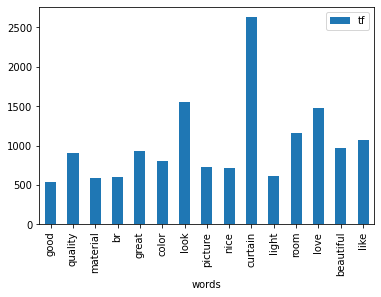

In [537]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf");

### **Adım 2:**  WordCloud görselleştirme işlemi için; 

a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz.

b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz.

c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.

d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)


**a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz.**

In [538]:
text = " ".join(i for i in df["REVIEW"])

In [539]:
text

'happy good quality material however panel mi matched product fun bedroom window br imagery bit stretched still fun br material lightweight sheer appreciate lo que e que un poco ma great bang buck believe quality material vibrant color style work beautifully tie together look different photo exactly looking heavy material great price fast looking picture thought curtain would thinner sheer nice thickness weight help insulate front window look absolutely perfect arrived quickly pleased purchase much thought would really expecting wanting use curtain picture show rd set ambesonne curtain one set use spring summer one autumn set christmas winter durable color vibrant recommend curtain block view living room front door kitchen dining area mess easily seen visitor put christmas light around really brightens everything private closed darkening point block light work fine night curtain sheer daytime labeled darkening curtain fault ordering  love curtain printed polyester type material back ma

**b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz.**

In [540]:
wordcloud = WordCloud()

**c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.**

In [541]:
wordcloud = wordcloud.generate(text)

**d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)**

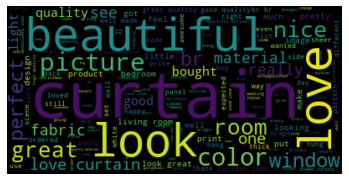

In [542]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Görev 3: Duygu Analizi**

### **Adım 1:** Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz.

**Öncelikle download işlemini gerçekleştirelim.**

In [543]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**SentimentIntensityAnalyzer nesnesini oluşturalım.**

In [544]:
sia = SentimentIntensityAnalyzer()

### **Adım 2:** SentimentIntensityAnalyzer nesnesi ile polarite puanlarının inceleyiniz;
a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız.

b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz.

c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz. 

d."Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz.

**a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız.**

In [545]:
df["REVIEW"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
2    {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: REVIEW, dtype: object

In [546]:
for i in range(10):
  print(df["REVIEW"][0:10].apply(lambda x: sia.polarity_scores(x))[i])

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.8519}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.9042}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.908}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7096}


**Bizim odaklanacak olduğumuz metrik compound metriğidir.**

**Compund metriği sıfırdan büyük ise bu cümle pozitif bir cümle, sıfırdan küçük ise negatif bir cümle olduğunu görüyoruz.**

**Sadece Compund değerlerini almak isteyelim.**

**b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz.**

In [547]:
com_scr = df["REVIEW"][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

In [548]:
com_scr

0   0.572
1   0.440
2   0.852
3   0.000
4   0.904
5   0.000
6   0.625
7   0.908
8   0.000
9   0.710
Name: REVIEW, dtype: float64

**Görüldüğü üzere cümlelerin çoğu pozitif cümle.**

**c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz.**

In [549]:
cls = ["pos" if col >= 0  else "neg" for col in com_scr]

In [550]:
cls

['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']

In [551]:
pd.DataFrame({"Compund Score": com_scr,
              "Class":cls})

,Compund Score,Class
0,0.572,pos
1,0.440,pos
2,0.852,pos
3,0.000,pos
4,0.904,pos
5,0.000,pos
6,0.625,pos
7,0.908,pos
8,0.000,pos
9,0.710,pos


In [552]:
df.head()

,STAR,HELPFUL,TITLE,REVIEW
0,5,0,looks great,happy
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...
3,5,0,Que se ven elegantes muy finas,lo que e que un poco ma
4,5,0,Wow great purchase,great bang buck believe quality material vibra...


**d."Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz.**

In [553]:
df["polarity_score"] = df["REVIEW"].apply(lambda x: sia.polarity_scores(x)['compound'])

In [554]:
df.head()

,STAR,HELPFUL,TITLE,REVIEW,polarity_score
0,5,0,looks great,happy,0.572
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched,0.440
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...,0.852
3,5,0,Que se ven elegantes muy finas,lo que e que un poco ma,0.000
4,5,0,Wow great purchase,great bang buck believe quality material vibra...,0.904


In [555]:
df["sentiment_label"] = df["polarity_score"].apply(lambda x: "pos" if x>0 else "neg")

In [556]:
df.head()

,STAR,HELPFUL,TITLE,REVIEW,polarity_score,sentiment_label
0,5,0,looks great,happy,0.572,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched,0.440,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...,0.852,pos
3,5,0,Que se ven elegantes muy finas,lo que e que un poco ma,0.000,neg
4,5,0,Wow great purchase,great bang buck believe quality material vibra...,0.904,pos


**Pozitif negatif olan sınıflarımıızn frekanslarına bakalım.**

In [557]:
df["sentiment_label"].value_counts()

pos    4827
neg     784
Name: sentiment_label, dtype: int64

**Artık bağımlı değişkenimizi oluşturmuş olduk.**

## **Görev 4: Makine Öğrenmesine Hazırlık**

**Öncelikle bağımlı değişkenimizi sayısal hale getirmek için encode (Binary Code) edelim.**

In [558]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [559]:
df.head()

,STAR,HELPFUL,TITLE,REVIEW,polarity_score,sentiment_label
0,5,0,looks great,happy,0.572,1
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched,0.440,1
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...,0.852,1
3,5,0,Que se ven elegantes muy finas,lo que e que un poco ma,0.000,0
4,5,0,Wow great purchase,great bang buck believe quality material vibra...,0.904,1


### **Adım 1:**  Bağımlı ve bağımsız değişkenlerimizi belirleyerek veriyi train test olarak ayırınız.

**Bağımlı değişken.**

In [560]:
y = df["sentiment_label"] 

**Bağımsız Değişken**

In [561]:
X = df["REVIEW"]

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=17)

### **Adım 2:** Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte; 

a. TfidfVectorizer kullanarak bir nesne oluşturunuz.

b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.

c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

**a. TfidfVectorizer kullanarak bir nesne oluşturunuz.**

In [563]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [564]:
tf_idf_vectorizer = TfidfVectorizer()

**b. Daha önce ayırmış olduğumuz train verimizi kullanarak oluşturduğumuz nesneye fit ediniz.**

In [565]:
X_tf_idf_word = tf_idf_vectorizer.fit(X_train)

**c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.**

**Train Verisi**

In [566]:
X_train_tf_idf_word = X_tf_idf_word.transform(X_train)

**Test Verisi**

In [567]:
X_test_tf_idf_word = X_tf_idf_word.transform(X_test)

## **Görev 5: Modelleme (Lojistik Regresyon)**

### **Adım 1:** Lojistik regresyon modelini kurarak train dataları ile fit ediniz.

In [568]:
log_model = LogisticRegression().fit(X_train_tf_idf_word, y_train)

In [569]:
X_train.head()

556                       curtain short said picture show
3979    really nice reason one curtain inch longer one ok
3223    curtain feel like shower curtain short look lo...
848     wider plank picture purple tint instead gray a...
0                                                   happy
Name: REVIEW, dtype: object

### **Adım 2:** Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz;

a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.

b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.

c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız.

**a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.**

In [570]:
y_pred = log_model.predict(X_test_tf_idf_word)

In [571]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

**b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.**

In [572]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.28      0.43       161
           1       0.89      1.00      0.94       962

    accuracy                           0.89      1123
   macro avg       0.91      0.64      0.68      1123
weighted avg       0.90      0.89      0.87      1123



**c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız.**

In [573]:
cs_log = cross_val_score(log_model,
                         X_train_tf_idf_word, y_train,
                         scoring = "accuracy", n_jobs=-1,
                         cv = 5).mean()

In [574]:
cs_log

0.9030765754693324

### **Adım 3:** Veride bulunan yorumlardan ratgele seçerek modele sorulması;
a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız.

b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.

c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.

d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.

e. Örneklemi ve tahmin sonucunu ekrana yazdırınız

**a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız.**

In [575]:
random_review = X_test.sample(1, random_state=17)

In [576]:
random_review

331    nice like painting wall bit translucent make p...
Name: REVIEW, dtype: object

**b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.**

In [577]:
from sklearn.feature_extraction.text import CountVectorizer

In [578]:
vectorizer = CountVectorizer()

**c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.**

In [579]:
X_count = vectorizer.fit(X_train).transform(random_review)

In [580]:
vectorizer.get_feature_names()

['ability',
 'able',
 'absolute',
 'absolutely',
 'abstract',
 'abut',
 'accent',
 'acceptable',
 'accessory',
 'accommodate',
 'account',
 'accurate',
 'across',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'adjacent',
 'adjust',
 'adjustment',
 'admire',
 'admiring',
 'admit',
 'adorable',
 'adore',
 'adult',
 'advertise',
 'advertised',
 'advertisement',
 'advertising',
 'advise',
 'aesthetic',
 'affect',
 'afford',
 'affordable',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'afterwards',
 'ago',
 'agrado',
 'agree',
 'ahead',
 'air',
 'airy',
 'al',
 'alaska',
 'albeit',
 'alice',
 'align',
 'alignment',
 'alittle',
 'alive',
 'allot',
 'allow',
 'allowed',
 'allows',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'alright',
 'also',
 'alter',
 'alternate',
 'alternative',
 'although',
 'always',
 'amazed',
 'amazing',
 'amazon',
 'ambersonne',
 'ambesonne',
 'ambessone',
 'ambiance',
 '

**d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.**

In [581]:
y_pred = log_model.predict(X_count)

**e. Örneklemi ve tahmin sonucunu ekrana yazdırınız**

In [582]:
y_pred

array([1])

## **Görev 6: Modelleme (Random Forest)**

### **Adım 1:** Random Forest modeli ile tahmin sonuçlarının gözlenmesi;
a. RandomForestClassifier modelini kurup fit ediniz.

b. Cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız

c. Lojistik regresyon modeli ile sonuçları karşılaştırınız.


**a. RandomForestClassifier modelini kurup fit ediniz.**

In [583]:
rf_model = RandomForestClassifier(random_state=17).fit(X_train_tf_idf_word, y_train)

**b. Cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız**

In [584]:
cs_rf = cross_val_score(rf_model, X_train_tf_idf_word, y_train, scoring = "accuracy", cv=5, n_jobs=-1).mean()

In [585]:
cs_rf

0.9293686204696178

In [586]:
pd.DataFrame({"Cross Validation - Accuracy Score": [cs_log, cs_rf]},
             index = ["Lojistik Regresyon", "Random Forest"])

,Cross Validation - Accuracy Score
Lojistik Regresyon,0.903
Random Forest,0.929


**Görldüğü üzere bizim için en iyi sonucu Random Forest algoritması vermiştir.**